In [1]:
from numpy import loadtxt
import numpy as np
import pandas as pd
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
dataframe = pd.read_csv('pima-indians-diabetes (1).csv', delimiter=',')
dataframe.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
X = dataframe.iloc[:,:8]
y = dataframe.iloc[:,8]

In [6]:
dataframe.shape

(767, 9)

In [7]:
features_train,features_test,target_train,target_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [9]:

network=models.Sequential()
network.add(Dense(units=8,activation="relu",input_shape=(features_train.shape[1],)))
network.add(Dense(units=8,activation="relu"))
#network.add(Dense(units=16,activation="relu"))
network.add(Dense(units=1,activation="sigmoid"))

In [10]:
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history=network.fit(features_train,target_train,epochs=20,verbose=1,batch_size=100,validation_data=(features_test,target_test))

Epoch 1/20
6/6 [==============================] - 0s 31ms/step - loss: 1.0212 - accuracy: 0.5926 - val_loss: 0.9059 - val_accuracy: 0.5984
Epoch 2/20
6/6 [==============================] - 0s 13ms/step - loss: 0.9925 - accuracy: 0.6082 - val_loss: 0.9018 - val_accuracy: 0.6102
Epoch 3/20
6/6 [==============================] - 0s 13ms/step - loss: 0.9743 - accuracy: 0.6043 - val_loss: 0.8871 - val_accuracy: 0.6063
Epoch 4/20
6/6 [==============================] - 0s 13ms/step - loss: 0.9623 - accuracy: 0.6101 - val_loss: 0.8621 - val_accuracy: 0.6063
Epoch 5/20
6/6 [==============================] - 0s 12ms/step - loss: 0.9370 - accuracy: 0.6101 - val_loss: 0.8329 - val_accuracy: 0.6339
Epoch 6/20
6/6 [==============================] - 0s 13ms/step - loss: 0.9280 - accuracy: 0.6257 - val_loss: 0.8389 - val_accuracy: 0.6142
Epoch 7/20
6/6 [==============================] - 0s 14ms/step - loss: 0.9145 - accuracy: 0.6238 - val_loss: 0.8364 - val_accuracy: 0.6142
Epoch 8/20
6/6 [===========

In [13]:
training_loss=history.history["loss"]
test_loss=history.history["val_loss"]

In [14]:
epoch_count=range(1,len(training_loss)+1)

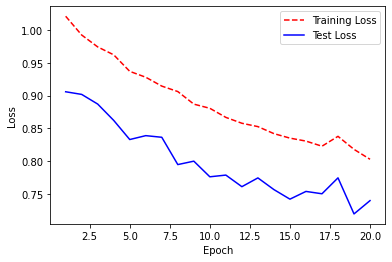

In [15]:
plt.plot(epoch_count,training_loss,"r--")
plt.plot(epoch_count,test_loss,"b-")
plt.legend(["Training Loss","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [16]:
_, accuracy = network.evaluate(features_train,target_train)
print('Accuracy: %.2f' % (accuracy*100))

17/17 [==============================] - 0s 935us/step - loss: 0.8004 - accuracy: 0.6218
Accuracy: 62.18


In [17]:
predicted_target= network.predict(features_test)

In [18]:
_, accuracy = network.evaluate(features_test,target_test)
print('Accuracy: %.2f' % (accuracy*100))

8/8 [==============================] - 0s 1ms/step - loss: 0.7397 - accuracy: 0.6378
Accuracy: 63.78


In [19]:
for i in range(10):
    print(predicted_target[i])

[0.5542946]
[0.30239123]
[0.93503064]
[0.9876255]
[0.3109935]
[0.5974994]
[0.31755865]
[0.9701935]
[0.916945]
[0.42197728]


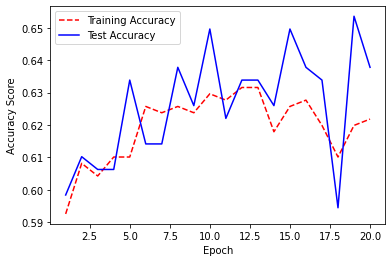

In [20]:
training_accuracy=history.history["accuracy"]
test_accuracy=history.history["val_accuracy"]
plt.plot(epoch_count,training_accuracy,"r--")
plt.plot(epoch_count,test_accuracy,"b-")
plt.legend(["Training Accuracy","Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()